In [ ]:
import pandas as pd
import numpy as np

#pd.options.display.max_colwidth=500
#pd.set_option('display.max_columns', None)

# Repaso Pandas
Vamos a crear un dataframe y recordar los principales comandos vistos en clases anteriores, además de ver comandos nuevos que vamos a usar en la parte final de los ejercicios. Vamos a repasar los siguientes conceptos.
EJERCICIO ANTERIOR
1. Creación y modificación de df:
  * [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
  * [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
2. Búsqueda de datos:
  * [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
  * [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)
  * [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
  * [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
  * [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
  * [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)
  * [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.SeriesGroupBy.unique.html?highlight=unique)
  * [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)
3. Funciones:
  * [any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html): Utilizaremos la funcion apply cuando queremos aplicar una funcion a todos los elementos de nuestra DF.
  * [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html): Utilizaremos la función map cuando queremos aplicar una funcion a todos los elementos de una columna. La función Map() toma como argumento otra función, que contiene el código que queremos aplicar a cada elemento de la lista o columna.

  La principal diferencia entre ellos es que applymap es un función basada en elementos que trabaja en el dataframe, mientras map lo hace en las series, o sea una columna o una fila.

In [ ]:
  #REPASO
#Paso 1. Creamos un dataframe llamado alumnos el cual va a tener tres columnas con los siguientes valores:
# Nombre: Julian,Maria,Gonzalo - STRING
# Empresa: Eci, Bankia, BBVA - STRING
# Edad: 25,30,35 - INTEGER
# Id_Usuario: 1,2,3
#Además ponemos un índice con valores A,B,C
alumnos= pd.DataFrame ({
    'Nombre':['Julian','Maria','Gonzalo'],
    'Empresa': ['Eci','Bankia','BBVA'],
    'Edad': [25,30,35],
    'Id_Usuario': [1,2,3]
    }, index=["A","B","C"]
)
alumnos


,Nombre,Empresa,Edad,Id_Usuario
A,Julian,Eci,25,1
B,Maria,Bankia,30,2
C,Gonzalo,BBVA,35,3


In [ ]:
#REPASO
#Paso 1.2 Creamos un dataframe con los mismos valores que el df de alumnos, llamado alumnos_duplicados
# Nombre: Julian,Julian,Gonzalo
# Empresa: Eci, Bankia, BBVA
# Edad: 25,30,35* Incluimos los valores de EDAD como STRING
#Además ponemos un índice con valores 1,2,3
alumnos_duplicados = pd.DataFrame (
    {
    'Nombre':['Julian','Julian','Gonzalo'],
    'Empresa': ['Eci','Bankia','BBVA'],
    'Edad': [25,30,35],
     'Id_Usuario': [1,2,3],
    }, index= ["1","2","3"]
)
alumnos_duplicados

,Nombre,Empresa,Edad,Id_Usuario
1,Julian,Eci,25,1
2,Julian,Bankia,30,2
3,Gonzalo,BBVA,35,3


In [ ]:
# Analizamos las primeras filas del dataframe
alumnos.head

<bound method NDFrame.head of     Nombre Empresa  Edad  Id_Usuario
A   Julian     Eci    25           1
B    Maria  Bankia    30           2
C  Gonzalo    BBVA    35           3>

In [ ]:
# Analizamos las primeras filas del dataframe
alumnos.head (2)
alumnos.tail (1)

,Nombre,Empresa,Edad,Id_Usuario
C,Gonzalo,BBVA,35,3


In [ ]:
# Otra manera de ver filas
alumnos[0:2]

,Nombre,Empresa,Edad,Id_Usuario
A,Julian,Eci,25,1
B,Maria,Bankia,30,2


In [ ]:
# Ahora vamos a buscar por Nombre (dos maneras)
alumnos[alumnos.Nombre== 'Julian']

,Nombre,Empresa,Edad,Id_Usuario
A,Julian,Eci,25,1


In [ ]:
# Ahora vamos a buscar por Nombre (dos maneras) #Esto es por si hay espacios entre columnas, para filtar exactamente por el nombre de la columna
alumnos[alumnos ['Nombre']== 'Maria']

,Nombre,Empresa,Edad,Id_Usuario
B,Maria,Bankia,30,2


In [ ]:
#NUEVO
#Paso 2. Vamos a poner la columna Id_Usuario como índice.
# Para eso usamos el comando set_index, el cual nos permite colocar una columna como índice
alumnos.set_index ('Id_Usuario')

,Nombre,Empresa,Edad
Id_Usuario,,,
1,Julian,Eci,25
2,Maria,Bankia,30
3,Gonzalo,BBVA,35


In [ ]:
#REPASO
#Paso 3. Le vamos a añadir dos nuevas columnas y vamos a incluir los siguientes valores.
# Puesto_Empresa: CDO, NaN (Valor vacío), Data Engineering
# Columnar_A_Eliminar: fila1, fila2, fila3
#para poner vacios es através de NUMPY y se pone np.nan
alumnos ["Puesto_empresa"]=["CDO", np.nan, "Data Engineering"]
alumnos ["Columnar_A_Eliminar"]=["fila1", "fila2", "fila3"]
alumnos

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa,Columnar_A_Eliminar
A,Julian,Eci,25,1,CDO,fila1
B,Maria,Bankia,30,2,NaN,fila2
C,Gonzalo,BBVA,35,3,Data Engineering,fila3


In [ ]:
#NUEVO
#Paso 4.1. Ahora eliminamos la columna Columna_A_Eliminar, usamos el método DROP para eso.
#Hay que pasarle como parámetros la columna a eliminar y el AXIS
#¿Qué es AXIS?, parámetro el cual nos indica si queremos eliminar una fila o una columna, siendo 0 filas y 1 columnas
#Por defecto te coge siempre el 0
#Por defecto PANDAS siempre trabaja pror filas si se quiere trabajar po columnas hay que poner AXIS=1
alumnos= alumnos.drop (['Columnar_A_Eliminar'],axis=1)
alumnos

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa
A,Julian,Eci,25,1,CDO
B,Maria,Bankia,30,2,NaN
C,Gonzalo,BBVA,35,3,Data Engineering


In [ ]:
#REPASO
#Paso 4.2. Vamos a renombrar la nueva columna que hemos creado que nos queda.
# Pasará a llamarse Puesto en vez de Puesto_empresa, tenemos que poner el parámetro inplace a TRUE porque si no, no se guarda dicho valor.
# Eso lo hacemos con el comando rename, al cual le pasamos un diccionario con el nombre antiguo y el nuevo.

#otra forma de hacer la asignacion sin hacerla como tal: alumnos.rename(columns={"Puesto_empresa":"Puesto"},inplace=True)
alumnos.rename (columns={"Puesto_Empresa":"Puesto"}, inplace=True)
alumnos

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa
A,Julian,Eci,25,1,CDO
B,Maria,Bankia,30,2,NaN
C,Gonzalo,BBVA,35,3,Data Engineering


In [ ]:
#REPASO
#Paso 5.1. Vamos a ver solo la primera fila de valores del df alumnos con head.
#Por defecto te coge 5 filas si no le pones algún nº como parámetro


In [ ]:
#NUEVO
#Paso 5.2. Vamos a ver la última fila de valores del df alumnos (Sin usar head).
# La otra opción es usar tail.
#Por defecto te coge 5 filas si no le pones algún nº como parámetro


In [ ]:
#REPASO
#Paso 6. Vamos a ver las columnas que tenemos del df alumnos. ¿Nos acordamos cómo?
alumnos.columns

Index(['Nombre', 'Empresa', 'Edad', 'Id_Usuario', 'Puesto_empresa'], dtype='object')

In [ ]:
#NUEVO
#Paso 7. Ahora queremos ver el formato específico de la columna Edad.
#Para ello usamos el método dtype
alumnos.Edad.dtype

dtype('int64')

In [ ]:
#NUEVO
#Paso 8. Sacamos una descripción de nuestro dataframe.
alumnos.describe ()

,Edad,Id_Usuario
count,3.0,3.0
mean,30.0,2.0
std,5.0,1.0
min,25.0,1.0
25%,27.5,1.5
50%,30.0,2.0
75%,32.5,2.5
max,35.0,3.0


In [ ]:
#NUEVO
#Paso 9. Queremos copiar nuestro dataframe a uno nuevo, lo podemos hacer de dos maneras.
df1=alumnos
df1

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa
A,Julian,Eci,25,1,CDO
B,Maria,Bankia,30,2,NaN
C,Gonzalo,BBVA,35,3,Data Engineering


In [ ]:
df2=alumnos.copy()
df2

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa
A,Julian,Eci,25,1,CDO
B,Maria,Bankia,30,2,NaN
C,Gonzalo,BBVA,35,3,Data Engineering


In [ ]:
alumnos ['Columnar_A_Eliminar']=["fila1","fila2","fila3"]

In [ ]:
df2

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa
A,Julian,Eci,25,1,CDO
B,Maria,Bankia,30,2,NaN
C,Gonzalo,BBVA,35,3,Data Engineering


In [ ]:
#REPASO
#Paso 10.1. Como visualizar un dataframe. Primero vamos a seleccionar solo la columna Empresa.
alumnos ['Empresa']
alumnos.Empresa

A       Eci
B    Bankia
C      BBVA
Name: Empresa, dtype: object

In [ ]:
#REPASO
#Paso 10.2. Como visualizar un dataframe. Vamos a seleccionar los valores de la fila dos, columna EMPRESA. Usaremos loc para eso.
#loc es localización de mis numbers de filas
#alumnos.loc [2,'Empresa']
alumnos_duplicados.loc ['2','Empresa']

'Bankia'

In [ ]:
#REPASO
#Paso 10.2. Como visualizar un dataframe. Vamos a seleccionar los valores de la fila dos, columna EMPRESA. Usaremos iloc para eso.
alumnos.iloc [1,1]

'Bankia'

In [ ]:
#NUEVO
#Paso 10.3. Como visualizar un dataframe. Vamos a seleccionar los valores de la fila dos, columna EMPRESA. Usaremos values para eso.
#es otro medio como iloc pero siempre hay que utilizar iloc
alumnos.values [1,1]

'Bankia'

In [ ]:
#NUEVO
#Paso 10.4. Si queremos ver los valores unicos hay varias maneras.
#Primero sabiendo solo los valores diferentes de una solo columna.
#Para ello usamos unique, que nos permite diferenciar dichos valores
alumnos_duplicados.Nombre.unique ()


array(['Julian', 'Gonzalo'], dtype=object)

In [ ]:
#NUEVO
#Paso 10.5. Si queremos ver los valores unicos hay varias maneras.
#Segundo sabiendo el número de los valores únicos por columna.
#En este caso usamos nunique
alumnos_duplicados.Nombre.nunique ()

2

In [ ]:
#REPASO
#Paso 11.1. Modificar datos. Vamos a actualizar la información del valor que hay en la fila 3, Columna Nomnbre. Usaremos loc para eso.
# Lo vamos a cambiar por Lucia
alumnos.loc [3,"Nombre"]='Lucia'
alumnos


,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa,Columnar_A_Eliminar
A,Julian,Eci,25.0,1.0,CDO,fila1
B,Maria,Bankia,30.0,2.0,NaN,fila2
C,Gonzalo,BBVA,35.0,3.0,Data Engineering,fila3
3,Lucia,NaN,NaN,NaN,NaN,NaN


In [ ]:
#REPASO
#Paso 11.2. Modificar datos. Vamos a actualizar la información del valor que hay en la fila 3, Columna Empresa. Usaremos iloc para eso.
# Lo vamos a cambiar por TheValley
alumnos.iloc [2,1] ='TheValley'
alumnos

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa,Columnar_A_Eliminar
A,Julian,Eci,25.0,1.0,CDO,fila1
B,Maria,Bankia,30.0,2.0,NaN,fila2
C,Gonzalo,TheValley,35.0,3.0,Data Engineering,fila3
3,Lucia,NaN,NaN,NaN,NaN,NaN


In [ ]:
#REPASO
#Paso 11.3. Modificar datos. Vamos a actualizar la información del valor que hay en la fila 3, Columna Edad. Usaremos at para eso.
# Lo vamos a cambiar por 50
#at es igual que loc
alumnos.at [3,"Edad"]=50
alumnos


,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa,Columnar_A_Eliminar
A,Julian,Eci,25.0,1.0,CDO,fila1
B,Maria,Bankia,30.0,2.0,NaN,fila2
C,Gonzalo,TheValley,35.0,3.0,Data Engineering,fila3
3,Lucia,NaN,50.0,NaN,NaN,NaN


In [ ]:
#REPASO
#Paso 12.1. Buscar información. Mediante isin() podemos buscar valores de un dataframe dentro de otro df.
#Vamos a buscar en alumnos que valores hay de alumnos_duplicados
#isin se usa sobre columnas
#se usa mucho para buscar duplicados
#mira todos los valores, no solo filas

alumnos_duplicados [alumnos_duplicados.Nombre.isin(alumnos.Nombre)]

In [ ]:
#REPASO
# Porque me saca todo falsa? porque los indices tienen que coincidir para que puedas buscar DF entre ellos
# Para solucionarlo ello creamos el DF duplicados otra vez con el índice a enteros


In [ ]:
#REPASO
#Paso 12.2. Buscar información. Si queremos pasarle una simple cadena la tenemos que meter como si fuera un array. También con isin()
#Buscar la cadena Gonzalo


In [ ]:
#REPASO APPLY/MAP
#1. Vamos a crear un nuevo dataframe llamada prueba_map
#.  El dataframe va a estar formado por dos columnas llamadas:
# - Ingresos - Valores: 100,50,25
# - Num_Transferencias_Realizadas - Valores: 4,10,25

prueba_map = pd.DataFrame (
    {
    'Ingresos': [100,50,25],
     'Num_Transferencias_Realizadas': [4,10,25]
}
)

prueba_map

,Ingresos,Num_Transferencias_Realizadas
0,100,4
1,50,10
2,25,25


In [ ]:
#2. Por otro lado, vamos a crear una función nueva que la vamos a llamar sumar_cinco y le vamos a pasar un parámetro al cual se le va a sumar cinco
def sumar_cinco (x):
  return x + 5

In [ ]:
#3. Ahora vamos a aplicar dicha función a una de nuestras columnas. La col ingresos
prueba_map.Ingresos = prueba_map.Ingresos.map (sumar_cinco)

In [ ]:
#4. ¿Que pasa si lo hacemos con apply en vez de que con Map? --> Me lo aplica a todas las columnas
prueba_map.apply (sumar_cinco)

,Ingresos,Num_Transferencias_Realizadas
0,110,9
1,60,15
2,35,30


In [ ]:
#5. Vamos a crear un nuevo dataframe, llamado prueba_error, que tenga una columna más con texto
prueba_map ['col']= ['a','b','c']

In [ ]:
#6. Ahora vamos a aplicar el apply otra vez para ver que ocurre

#En este caso da error porque logicamente una de nuestra columnas es un string y no funciona, pero podemos arreglar esto en nuestra función
prueba_map.apply["Sumar_cinco"]

TypeError: ignored

In [ ]:
#7. Ahora vamos a crear otra funcion con lambda

#Para usarla vamos a incluira en una variable (no es estrictamente necesario)

funcion_lambda = lambda x : x + 5
prueba_map.Ingresos.map (funcion_lambda)

0    110
1     60
2     35
Name: Ingresos, dtype: int64

# Limpieza de vacíos
Vamos a trabajar con los siguientes métodos nuevos y que nos sirven para enriquecer toda la capa de transformación de los datos.
* [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull). No necesita parámetros de entrada
* [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). Parámetro a modificar, enteros o cadenas
* [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). No necesita parámetros de entrada

In [ ]:
#NUEVO
#Paso 13.1. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Primero vamos a encontrar los valores nulos
alumnos.isna ()


,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa,Columnar_A_Eliminar
A,False,False,False,False,False,False
B,False,False,False,False,True,False
C,False,False,False,False,False,False
3,False,True,False,True,True,True


In [ ]:
#NUEVO
#Paso 13.2. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Primero vamos a rellenar los vacíos con 0 y se lo pasamos como parámetro
alumnos.fillna (69)

,Nombre,Empresa,Edad,Id_Usuario,Puesto_empresa,Columnar_A_Eliminar
A,Julian,Eci,25.0,1.0,CDO,fila1
B,Maria,Bankia,30.0,2.0,69,fila2
C,Gonzalo,TheValley,35.0,3.0,Data Engineering,fila3
3,Lucia,69,50.0,69.0,69,69


In [ ]:
#NUEVO
#Paso 13.3. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Ahora vamos a eliminar la fila que tienen valores vacíos
#Al igual que con drop hay que pasarle como parámetros el AXIS
#¿Qué es AXIS?, parámetro el cual nos indica si queremos eliminar una fila o una columna, siendo 0 filas y 1 columnas
#Por defecto te coge siempre el 0
#elimina la fila con vacíos
alumnos.dropna ()



In [ ]:
#NUEVO
#Paso 13.4. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Ahora vamos a eliminar la columna que tienen valores vacíos
#si le pongo axis =1 te elimina la columna
alumnos.dropna(axis=1)

,Nombre,Edad
A,Julian,25.0
B,Maria,30.0
C,Gonzalo,35.0
3,Lucia,50.0


# Cadenas de texto
Existen un conjunto de métodos relaciondas con las cadenas de texto que nos sirven para modificar, buscar y limpiar dichas cadenas.
* [upper](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html). No necesita parámetros de entrada
* [lower](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html). No necesita parámetros de entrada
* [title](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html). No necesita parámetros de entrada
* [swapcase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.swapcase.html). No necesita parámetros de entrada
* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html). Hay que introducir como parámetros, primero el elemento a buscar, acto seguido, el elemento a reemplazar.
* [strip](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html). No necesita parámetros de entrada
* [contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html). Hay que introducir el valor a buscar como parámetro.


In [ ]:
#NUEVO
#Paso 14.1. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Primero vamos a convertir todos los valores de la columna Nombre a mayúsculas
alumnos.Nombre.str.upper()


A     JULIAN
B      MARIA
C    GONZALO
Name: Nombre, dtype: object

In [ ]:
#NUEVO
#Paso 14.2. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Segund vamos a convertir todos los valores de la columna Empresa a minúsculas
alumnos.Nombre.str.lower ()

In [ ]:
#NUEVO
#Paso 14.3. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Tercer vamos a convertir todos los valores de la columna Puesto como si fuera un título, primera mayúscula, resto minúscula

alumnos.Puesto.str.title ()

AttributeError: ignored

In [ ]:
#NUEVO
#Paso 14.4. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Cuarto vamos a convertir todos los valores de la columna Puesto y les vamos a "dar la vuelta", es decir las mayúsculas van a ser minúsculas y viceversa
alumnos.Puesto.str.swapcase ()
alumnos


In [ ]:
##14.5 cambiamos ECI POR SANTANDER
alumnosv2 = alumnos.Empresa.str.replace ('ECI', 'Santander')
alumnosv2

A          Eci
B       Bankia
C    TheValley
3          NaN
Name: Empresa, dtype: object

In [ ]:
#NUEVO
#Paso 14.6. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Seis, vamos a quitar la cadena de Data dentro de una cadena de la columna Puesto.
alumnos.Empresa.str.strip ('BB')

A      Eci
B    ankia
C       VA
Name: Empresa, dtype: object

In [ ]:
#NUEVO
#Paso 14.7. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Siete, vamos a buscar el texto Data en la columna de puesto
#Como parámetro tenemos que meter el tipo de formato a cambiar.
#Además solo se puede realizar sobre una columna o serie, no sobre todo el DF
#alumnos["Puesto_empresa"].str.contains("Data")
#Busca un valor y si lo encuentra me da verdadero
alumnos.Puesto.str.contains ('Data')

# Limpieza de duplicados y formatos
Tambien tenemos métodos para encontrar duplicados y cambiar formatos, métodos que nos sirven para enriquecer nuestro fichero.
* [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html).
* [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html). No necesita parámetros de entrada.
* [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.*html*). Hay que pasarle el formato al que queremos modificar la columna (int32, String, etc)

In [ ]:
#NUEVO
#Paso 15.1. Seguimos con métodos de limpieza, vamos a encontrar los valores duplicados
#Vamos a usar el dataframe que creamos al principio para buscarlos
alumnos_duplicados.Nombre.duplicated ()

In [ ]:
alumnos_duplicados

In [ ]:
#NUEVO
#Paso 15.2. Seguimos con métodos de limpieza, vamos a eliminar las filas con dichos valores duplicados
alumnos_duplicados.Nombre.drop_duplicates ()

In [ ]:
#NUEVO
#Paso 16. Ahora queremos cambiar el formato de uno de los campos que hemos visto que no tiene sentido, es decir la EDAD que está en STRING
#Para ello usamos astype el cual nos permite modificar dichos valores
alumnos_duplicados.Edad=alumnos_duplicados.Edad.astype('int64')
alumnos_duplicados.Edad.dtype

# Ejercicios a realizar solos
Ahora poco a poco vamos a ir intentando realizar los ejercicios con ficheros más grandes y con las funciones vistas anteriormente

libros= pd.read_csv(""https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/BL-Flickr-Images-Book.csv"")

https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/BL-Flickr-Images-Book.csv

In [ ]:
#Paso 1. Leamos el siguiente csv y llamamos al DF libros
libros= pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/BL-Flickr-Images-Book.csv")
libros

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
#Paso 2. Ver las primeras 5 entradas del df de libros
libros.head
libros

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
#Paso 3. Queremos eliminar las columnas que tiene algun valor vacío, cuidado SOLO LAS COLUMNAS
libros=libros.dropna(axis=1)

In [ ]:
#Paso 4. Convertimos la columna de Title y Contributors con la primera mayúscula y el resto minúsculaslibros.Title = libros['Title'].str.title()
libros.Title.str.title()
libros.Contributors.str.title()
libros.head()

,Identifier,Place of Publication,Title,Contributors,Issuance type,Flickr URL,Shelfmarks
0,206,London,Walter Forbes. [A novel.] By A. A,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,London; Virtue & Yorston,All for Greed. [A novel. The dedication signed...,"BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,Love the Avenger. By the author of “All for Gr...,"BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,"Welsh Sketches, chiefly ecclesiastical, to the...","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,"[The World in which I live, and my place in it...","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [ ]:
#Paso 5. Vamos a ver que columnas tienen valores únicos, primero viendo los valores únicos de TODAS las columnas.
libros.nunique(axis=0)

Identifier              8287
Place of Publication    1441
Title                   8210
Contributors            6674
Issuance type              2
Flickr URL              8287
Shelfmarks              8287
dtype: int64

In [ ]:
#Paso 6. Nos han informado que hay un error en el fichero y que la columna Place of Publication	las ciudad London son una errata que tenemos que modificar por Manchester.
#Reemplazamos dicho valor del df
libros.replace('London','Manchester')
libros.head()

,Identifier,Place of Publication,Title,Contributors,Issuance type,Flickr URL,Shelfmarks
0,206,London,Walter Forbes. [A novel.] By A. A,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,London; Virtue & Yorston,All for Greed. [A novel. The dedication signed...,"BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,Love the Avenger. By the author of “All for Gr...,"BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,"Welsh Sketches, chiefly ecclesiastical, to the...","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,"[The World in which I live, and my place in it...","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [ ]:
#Paso 7. Vamos a leer el otro fichero y lo vamos a llamar olimpiadas
#Cuidado!! La primera fila es la cabecera, tenemos que poner Header = 1 para que caputre la primera fila


In [ ]:
#Paso 8. Vamos a renombrar y cambiar los valores de las columnas siguientes:
#01 !: Oro
#02 !: Plata
#03 !: Bronce
#? Winter: Olimpiadas_Invierno
#Total: Total_Invierno
#01 !.1: Oro
#02 !.1: Plata
#03 !.1: Bronce
#Total.1: Total_Verano
#? Games: Total_Juegos
#01 !.2: Oro
#02 !.2: Plata
#03 !.2: Bronce


# DEJA TU FEEDBACK Y AYUDANOS A MEJORAR :)
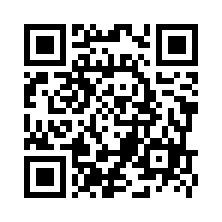